In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here: Pavan Yachamaneni </p>

# __Artificial Neural Network 2: In-Class__

<img src= "https://images.theconversation.com/files/168081/original/file-20170505-21003-zbguhy.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" width="50%">

From: [theconversation.com](http://theconversation.com/deep-learning-and-neural-networks-77259)

## Learning objectives

At the end of the exercise, you should be able to improve models by:
- Creating alternative network architecture.
- Using different approaches to initialize weights,
- Choosing learning rates,
- Applying batch normalization,
- Explore different activation functions,
- Applying different optmiziers for finding weights.

## Outline

1. [Review pre-class assignment](#preclass)
1. [Early stopping](#architecture)
1. [Tuning other hyperparameters](#tuning)
1. [Putting things together](#together)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

---
<a name="architecture"></a>
# 2. Deciding when to stop

## 2.1 Base model

In the 1st ANN session, we build a classification model for the Fashion MNIST dataset. 


&#9989; **<font color=blue>DO THIS:</font>** Get the data ready

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
from torchvision import transforms
fashion_train_data  =  datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
fashion_test_data  =  datasets.FashionMNIST(root='./data', train=False, download=True, transform=None)
import torch
X_train_full = fashion_train_data.data
y_train_full = fashion_train_data.targets
X_test = fashion_test_data.data
y_test = fashion_test_data.targets
X_train = X_train_full[:2000]/255
X_valid = X_train_full[2000:3000]/255 
y_train = y_train_full[:2000]
y_valid = y_train_full[2000:3000]

&#9989; **<font color=blue>DO THIS:</font>** Below is the base function toward the end of our 1st in-class session on ANN. Comment on the lines as indicated

In [35]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
def model_evaluate(net, X_test,y_test):
      pred_prob = net(X_test.float())
      corrects = 0
      for i in range(len(pred_prob)):
            pred_label = pred_prob[i].argmax()
            if pred_label == y_test[i]:
                corrects += 1
      return corrects/len(pred_prob)


net = Classifier()    ## initialtiong the classiffier class  that has forward, module evaluate methods
import torch.optim as optim
criterion = torch.nn.NLLLoss() ## initiates entropy loss function
optimizer = optim.SGD(net.parameters(), lr=0.25, momentum=0.9) ## initiates Stocastic gradient descent with the learning rate
epochs = 500
net.train() ## Tells model to start training
for e in range(epochs):
   optimizer.zero_grad() ## What does this line do?
   pred = net(X_train)  ## What does this line do?
   loss = criterion(pred,y_train) ## What does this line do?
   loss.backward() ## iniyiating back-prop
   optimizer.step()## update the weights
   print('Epoch: {} \t Training loss: {:.6f}'.format(e,loss.item()))
    
net.eval()
print(f'test accuracy {model_evaluate(net,X_test,y_test)}')     ## What does this line do?

Epoch: 0 	 Training loss: 2.305768
Epoch: 1 	 Training loss: 2.296447
Epoch: 2 	 Training loss: 2.282350
Epoch: 3 	 Training loss: 2.263348
Epoch: 4 	 Training loss: 2.233923
Epoch: 5 	 Training loss: 2.188562
Epoch: 6 	 Training loss: 2.125979
Epoch: 7 	 Training loss: 2.048526
Epoch: 8 	 Training loss: 1.979518
Epoch: 9 	 Training loss: 1.931056
Epoch: 10 	 Training loss: 1.880463
Epoch: 11 	 Training loss: 1.795772
Epoch: 12 	 Training loss: 1.746242
Epoch: 13 	 Training loss: 1.683212
Epoch: 14 	 Training loss: 1.631792
Epoch: 15 	 Training loss: 1.682700
Epoch: 16 	 Training loss: 1.795954
Epoch: 17 	 Training loss: 2.159154
Epoch: 18 	 Training loss: 1.996171
Epoch: 19 	 Training loss: 2.033934
Epoch: 20 	 Training loss: 1.886850
Epoch: 21 	 Training loss: 2.953184
Epoch: 22 	 Training loss: 1.925605
Epoch: 23 	 Training loss: 1.878984
Epoch: 24 	 Training loss: 1.865158
Epoch: 25 	 Training loss: 1.867750
Epoch: 26 	 Training loss: 1.836505
Epoch: 27 	 Training loss: 1.826284
Ep

Epoch: 228 	 Training loss: 1.596115
Epoch: 229 	 Training loss: 1.596112
Epoch: 230 	 Training loss: 1.596108
Epoch: 231 	 Training loss: 1.596105
Epoch: 232 	 Training loss: 1.596102
Epoch: 233 	 Training loss: 1.596098
Epoch: 234 	 Training loss: 1.596095
Epoch: 235 	 Training loss: 1.596093
Epoch: 236 	 Training loss: 1.596090
Epoch: 237 	 Training loss: 1.596088
Epoch: 238 	 Training loss: 1.596085
Epoch: 239 	 Training loss: 1.596082
Epoch: 240 	 Training loss: 1.596079
Epoch: 241 	 Training loss: 1.596076
Epoch: 242 	 Training loss: 1.596073
Epoch: 243 	 Training loss: 1.596071
Epoch: 244 	 Training loss: 1.596069
Epoch: 245 	 Training loss: 1.596066
Epoch: 246 	 Training loss: 1.596063
Epoch: 247 	 Training loss: 1.596060
Epoch: 248 	 Training loss: 1.596058
Epoch: 249 	 Training loss: 1.596056
Epoch: 250 	 Training loss: 1.596053
Epoch: 251 	 Training loss: 1.596050
Epoch: 252 	 Training loss: 1.596048
Epoch: 253 	 Training loss: 1.596045
Epoch: 254 	 Training loss: 1.596043
E

Epoch: 454 	 Training loss: 1.595835
Epoch: 455 	 Training loss: 1.595835
Epoch: 456 	 Training loss: 1.595835
Epoch: 457 	 Training loss: 1.595834
Epoch: 458 	 Training loss: 1.595834
Epoch: 459 	 Training loss: 1.595834
Epoch: 460 	 Training loss: 1.595833
Epoch: 461 	 Training loss: 1.595832
Epoch: 462 	 Training loss: 1.595832
Epoch: 463 	 Training loss: 1.595832
Epoch: 464 	 Training loss: 1.595831
Epoch: 465 	 Training loss: 1.595831
Epoch: 466 	 Training loss: 1.595831
Epoch: 467 	 Training loss: 1.595830
Epoch: 468 	 Training loss: 1.595830
Epoch: 469 	 Training loss: 1.595829
Epoch: 470 	 Training loss: 1.595829
Epoch: 471 	 Training loss: 1.595828
Epoch: 472 	 Training loss: 1.595828
Epoch: 473 	 Training loss: 1.595827
Epoch: 474 	 Training loss: 1.595827
Epoch: 475 	 Training loss: 1.595827
Epoch: 476 	 Training loss: 1.595826
Epoch: 477 	 Training loss: 1.595826
Epoch: 478 	 Training loss: 1.595825
Epoch: 479 	 Training loss: 1.595825
Epoch: 480 	 Training loss: 1.595825
E

&#9989; **<font color=blue>DO THIS:</font>** Instead of blindly stopping at a pre-defined number of iterations as we previously did, we now use a clearer way to determine where to stop so that we can use the best model/parameters in the testing stage. The code below accomplishs four things

1. For each iteration, we print out and keep track of the validation loss (the cost on the validation dataset). Since the validation data is not used for training, then in principle, the better the model performs on the validation dataset, the better it will perform on the test dataset. So, we use the validation loss as an indicator of the quality of the model during training.
1. Every time we see a new low of the validation loss, we save the current model parameters 
1. In the testing stage, we load the model that achieved the smallest validation loss and uses that for prediction
1. If we do not see a new low in 50 consecutive iterations, we stop the iteration (early stopping).

Now please read the code and comment on the lines as indicated. 

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" ## Code that prevent pyplot from crushing 

In [24]:
import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
import torch.optim as optim
#criterion = torch.nn.MSELoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.08, momentum=0.9)
epochs = 250
net.train()
train_history = []
val_history = []
best_loss = 1e5
early_stopping = 0 
for e in range(epochs):
   optimizer.zero_grad()
   pred = net(X_train)
   loss = criterion(pred,y_train)
   val_loss = criterion(net(X_valid),y_valid) ## computes validation loss
   loss.backward()
   optimizer.step()
   train_history.append(loss.item())
   val_history.append(val_loss.item())
   if val_loss < best_loss:
      early_stopping = 0
      best_loss = val_loss
      torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
   else:
      early_stopping += 1     
   if early_stopping == 150:  # model have not found in 50 epochs
       break
   print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,loss.item(), val_loss.item()))
plt.figure(figsize=(7,7))
plt.plot(train_history, 'b', val_history,'r')
net.load_state_dict(torch.load('fashion_MNIST' + '.t7')) # what does this line do?
print(f'test accuracy {model_evaluate(net,X_test,y_test)}') # what does this line do?

Epoch: 0 	 Training loss: 2.306834 	 Validation loss: 2.305689
Epoch: 1 	 Training loss: 2.302763 	 Validation loss: 2.301800
Epoch: 2 	 Training loss: 2.295016 	 Validation loss: 2.294385
Epoch: 3 	 Training loss: 2.285054 	 Validation loss: 2.285011
Epoch: 4 	 Training loss: 2.274977 	 Validation loss: 2.275798
Epoch: 5 	 Training loss: 2.264399 	 Validation loss: 2.266154
Epoch: 6 	 Training loss: 2.251988 	 Validation loss: 2.254822
Epoch: 7 	 Training loss: 2.236687 	 Validation loss: 2.240801
Epoch: 8 	 Training loss: 2.217628 	 Validation loss: 2.223053
Epoch: 9 	 Training loss: 2.194143 	 Validation loss: 2.200854
Epoch: 10 	 Training loss: 2.165437 	 Validation loss: 2.173633
Epoch: 11 	 Training loss: 2.130444 	 Validation loss: 2.140752
Epoch: 12 	 Training loss: 2.088650 	 Validation loss: 2.101622
Epoch: 13 	 Training loss: 2.040156 	 Validation loss: 2.056456
Epoch: 14 	 Training loss: 1.986886 	 Validation loss: 2.006987
Epoch: 15 	 Training loss: 1.932454 	 Validation l

Epoch: 127 	 Training loss: 1.027355 	 Validation loss: 1.240301
Epoch: 128 	 Training loss: 1.025908 	 Validation loss: 1.239938
Epoch: 129 	 Training loss: 1.024711 	 Validation loss: 1.238834
Epoch: 130 	 Training loss: 1.022904 	 Validation loss: 1.239551
Epoch: 131 	 Training loss: 1.021707 	 Validation loss: 1.241169
Epoch: 132 	 Training loss: 1.020448 	 Validation loss: 1.240264
Epoch: 133 	 Training loss: 1.019083 	 Validation loss: 1.238441
Epoch: 134 	 Training loss: 1.017866 	 Validation loss: 1.238273
Epoch: 135 	 Training loss: 1.016409 	 Validation loss: 1.238810
Epoch: 136 	 Training loss: 1.015438 	 Validation loss: 1.240269
Epoch: 137 	 Training loss: 1.014282 	 Validation loss: 1.240891
Epoch: 138 	 Training loss: 1.013015 	 Validation loss: 1.239764
Epoch: 139 	 Training loss: 1.011982 	 Validation loss: 1.239317
Epoch: 140 	 Training loss: 1.010883 	 Validation loss: 1.240888
Epoch: 141 	 Training loss: 1.009917 	 Validation loss: 1.242046
Epoch: 142 	 Training los

In [25]:
best_loss

tensor(1.1012, grad_fn=<NllLossBackward0>)

&#9989; <font color=red>**QUESTION:**</font> Try the above code with various learning rates and epochs.
Discuss with your neighbors, how much improvement did you see with this new stopping strategy?

<font size=+3>&#9998;</font> 
Very high and very low learning rate is giving the low test accuracy. And for a fixed learning rate parameter, higer epochs decreases the loss.

---
<a name="architecture"></a>
# 3. Changing network architecture

&#9989; **<font color=blue>DO THIS:</font>** To get an idea how large the current neural network is, we can use the torchsummary package. Run the following command to install the package and use it to print out a summary of the model

In [26]:
!pip install torchsummary

In [27]:
from torchsummary import summary
summary(net,(784,1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 300]         235,500
            Linear-2                  [-1, 100]          30,100
            Linear-3                   [-1, 10]           1,010
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.02
Estimated Total Size (MB): 1.02
----------------------------------------------------------------


&#9989; <font color=red>**QUESTION:**</font> The test accuracy in Section 2 is not very satisfactory. Try to modify the parameters to increase the test performances. 
  - the number of layers
  - number of nodes in each layer
  - learning rate
  - epochs
  - number of training samples
  - other types of activations

**It is highly recommended that you wrap up the code for the network initializaiton+training+testing into a function with the hyperparameters (number of layers, number of nodes, lr, epochs, etc.) as inputs, it will make the task of searching for the best parameters much easier**
 

Epoch: 0 	 Training loss: 2.303474 	 Validation loss: 2.302680
Epoch: 1 	 Training loss: 2.303400 	 Validation loss: 2.302613
Epoch: 2 	 Training loss: 2.303259 	 Validation loss: 2.302486
Epoch: 3 	 Training loss: 2.303059 	 Validation loss: 2.302305
Epoch: 4 	 Training loss: 2.302807 	 Validation loss: 2.302077
Epoch: 5 	 Training loss: 2.302514 	 Validation loss: 2.301810
Epoch: 6 	 Training loss: 2.302186 	 Validation loss: 2.301512
Epoch: 7 	 Training loss: 2.301828 	 Validation loss: 2.301190
Epoch: 8 	 Training loss: 2.301449 	 Validation loss: 2.300849
Epoch: 9 	 Training loss: 2.301053 	 Validation loss: 2.300488
Epoch: 10 	 Training loss: 2.300644 	 Validation loss: 2.300113
Epoch: 11 	 Training loss: 2.300225 	 Validation loss: 2.299730
Epoch: 12 	 Training loss: 2.299798 	 Validation loss: 2.299338
Epoch: 13 	 Training loss: 2.299374 	 Validation loss: 2.298948
Epoch: 14 	 Training loss: 2.299003 	 Validation loss: 2.298601
Epoch: 15 	 Training loss: 2.298656 	 Validation l

Epoch: 128 	 Training loss: 1.604372 	 Validation loss: 1.642092
Epoch: 129 	 Training loss: 1.598913 	 Validation loss: 1.637413
Epoch: 130 	 Training loss: 1.593749 	 Validation loss: 1.636615
Epoch: 131 	 Training loss: 1.589140 	 Validation loss: 1.629813
Epoch: 132 	 Training loss: 1.586103 	 Validation loss: 1.635907
Epoch: 133 	 Training loss: 1.589116 	 Validation loss: 1.626942
Epoch: 134 	 Training loss: 1.621353 	 Validation loss: 1.689076
Epoch: 135 	 Training loss: 1.743400 	 Validation loss: 1.759680
Epoch: 136 	 Training loss: 2.034896 	 Validation loss: 2.107292
Epoch: 137 	 Training loss: 2.036254 	 Validation loss: 2.061848
Epoch: 138 	 Training loss: 2.013006 	 Validation loss: 2.037387
Epoch: 139 	 Training loss: 1.599025 	 Validation loss: 1.636696
Epoch: 140 	 Training loss: 2.089555 	 Validation loss: 2.070106
Epoch: 141 	 Training loss: 2.043203 	 Validation loss: 2.149937
Epoch: 142 	 Training loss: 1.855902 	 Validation loss: 1.863201
Epoch: 143 	 Training los

Epoch: 255 	 Training loss: 1.610120 	 Validation loss: 1.766133
Epoch: 256 	 Training loss: 1.608221 	 Validation loss: 1.769811
Epoch: 257 	 Training loss: 1.602836 	 Validation loss: 1.765292
Epoch: 258 	 Training loss: 1.600649 	 Validation loss: 1.765962
Epoch: 259 	 Training loss: 1.599862 	 Validation loss: 1.769823
Epoch: 260 	 Training loss: 1.599222 	 Validation loss: 1.771247
Epoch: 261 	 Training loss: 1.596599 	 Validation loss: 1.774973
Epoch: 262 	 Training loss: 1.592403 	 Validation loss: 1.771991
Epoch: 263 	 Training loss: 1.589207 	 Validation loss: 1.773410
Epoch: 264 	 Training loss: 1.586543 	 Validation loss: 1.774356
Epoch: 265 	 Training loss: 1.584468 	 Validation loss: 1.775651
Epoch: 266 	 Training loss: 1.583615 	 Validation loss: 1.780026
Epoch: 267 	 Training loss: 1.583933 	 Validation loss: 1.779762
Epoch: 268 	 Training loss: 1.587414 	 Validation loss: 1.790869
Epoch: 269 	 Training loss: 1.602771 	 Validation loss: 1.799465
Epoch: 270 	 Training los

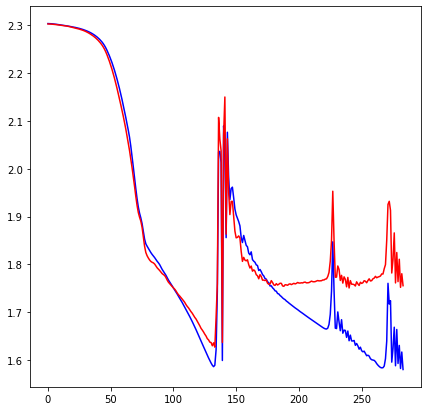

In [33]:
#Put your code here

import torch.nn as nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,1000)
        self.fc2 = nn.Linear(1000,500)
        self.fc3 = nn.Linear(500,250)
        self.fc4 = nn.Linear(250,100)
        self.fc5 = nn.Linear(100,10)
    
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.log_softmax(x,dim=1)
        return x
    
net = Classifier()    
import torch.optim as optim
#criterion = torch.nn.MSELoss()
criterion = torch.nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.05, momentum=0.9)
epochs = 500
net.train()
train_history = []
val_history = []
best_loss = 1e5
early_stopping = 0 
for e in range(epochs):
   optimizer.zero_grad()
   pred = net(X_train)
   loss = criterion(pred,y_train)
   val_loss = criterion(net(X_valid),y_valid) ## computes validation loss
   loss.backward()
   optimizer.step()
   train_history.append(loss.item())
   val_history.append(val_loss.item())
   if val_loss < best_loss:
      early_stopping = 0
      best_loss = val_loss
      torch.save(net.state_dict(), 'fashion_MNIST' + '.t7')  #what does this line do?
   else:
      early_stopping += 1     
   if early_stopping == 150:  # model have not found in 50 epochs
       break
   print('Epoch: {} \t Training loss: {:.6f} \t Validation loss: {:.6f}'.format(e,loss.item(), val_loss.item()))
plt.figure(figsize=(7,7))
plt.plot(train_history, 'b', val_history,'r')
net.load_state_dict(torch.load('fashion_MNIST' + '.t7')) # what does this line do?
print(f'test accuracy {model_evaluate(net,X_test,y_test)}') # what does this line do?

&#9989; **<font color=blue>DO THIS:</font>** Report the best performance you get:

- for each parameter setting, you should train the network 10 times and report the average test accuracy
- post your parameters and accuracy in [this Google Spreadsheet](https://docs.google.com/spreadsheets/d/18zfhKed3VbWuMjTXtyrwuJel0rwmJLPMtlNJFhblvhs/edit?usp=sharing)

-----
### Congratulations, we're done!